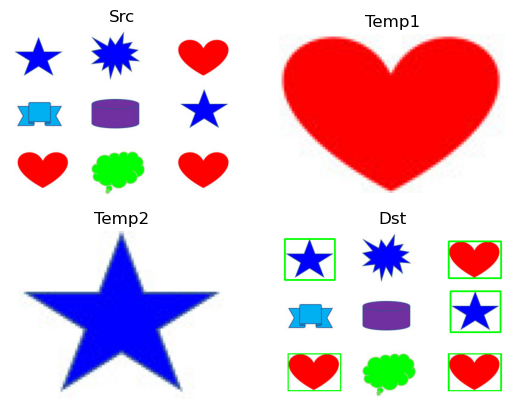

In [3]:
# 多模板匹配
import cv2
import matplotlib.pyplot as plt

def myMatch(image, tmp):
    ''' 執行匹配'''
    h, w = tmp.shape[0:2]                  # 取得height, width
    result = cv2.matchTemplate(image, tmp, cv2.TM_CCOEFF_NORMED)
    for row in range(len(result)):             # 找尋row
        for col in range(len(result[row])):         # 找尋column
            if result[row][col] > 0.95:           # 值大於0.95就算找到了
                match.append([(col, row), (col+w, row+h)]) # 左上與右下點加入串列
    return

src = cv2.imread("mutishapes1.jpg", cv2.IMREAD_COLOR)    # 讀取原始影像
plt.subplot(221)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Src')
plt.axis('off') 
temps = []
temp1 = cv2.imread("heart1.jpg", cv2.IMREAD_COLOR)     # 讀取匹配影像
plt.subplot(222)
plt.imshow(cv2.cvtColor(temp1, cv2.COLOR_BGR2RGB))
plt.title('Temp1')
plt.axis('off') 
temps.append(temp1)                     # 加入匹配串列temps
temp2 = cv2.imread("star.jpg", cv2.IMREAD_COLOR)      # 讀取匹配影像
plt.subplot(223)
plt.imshow(cv2.cvtColor(temp2, cv2.COLOR_BGR2RGB))
plt.title('Temp2')
plt.axis('off') 
temps.append(temp2)                     # 加入匹配串列temps
match = []                         # 符合匹配的圖案
for t in temps:
    myMatch(src, t)                     # 呼叫myMatch 函式
for img in match:
    dst = cv2.rectangle(src, (img[0]), (img[1]), (0, 255, 0), 1)
cv2.imshow("Dst", dst)
plt.subplot(224)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Dst')
plt.axis('off') 
cv2.waitKey(0)
cv2.destroyAllWindows()

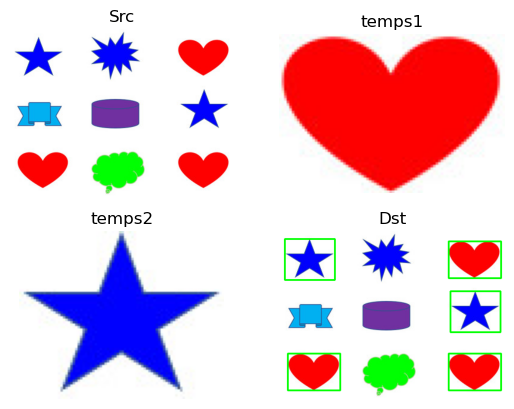

In [ ]:
# 多模板匹配 + 非極大值抑制
import cv2
import numpy as np
import matplotlib.pyplot as plt

def myMatch(image, tmp, thr=0.95, nms_iou=0.3):
    h, w = tmp.shape[:2]
    result = cv2.matchTemplate(image, tmp, cv2.TM_CCOEFF_NORMED)
    # 取出所有高於門檻的點
    ys, xs = np.where(result >= thr)
    boxes, scores = [], []
    for (x, y) in zip(xs, ys):
        boxes.append([int(x), int(y), int(w), int(h)]) # x, y, width, height
        scores.append(float(result[y, x]))
    # 沒找到就回傳空
    if not boxes:
        return []
    # NMS：只保留不重疊（或低重疊）的高分框
    indices = cv2.dnn.NMSBoxes(
        boxes, scores, score_threshold=thr, nms_threshold=nms_iou)
    final = []
    if len(indices) > 0:
        for i in indices.flatten():
            x, y, bw, bh = boxes[i]
            final.append(((x, y), (x + bw, y + bh)))
    return final
src = cv2.imread("mutishapes1.jpg")
plt.subplot(221)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Src')
plt.axis('off')
temps = [cv2.imread("heart1.jpg"), cv2.imread("star.jpg")]
for i in range(len(temps)):
    plots = 222 + i
    plt.subplot(plots)
    plt.imshow(cv2.cvtColor(temps[i], cv2.COLOR_BGR2RGB))
    plt.title(f'temps{i+1}')
    plt.axis('off')     
match = []
for t in temps:
    match += myMatch(src, t, thr=0.95, nms_iou=0.3) # IoU門檻0.3~0.5
for pt1, pt2 in match:
    cv2.rectangle(src, pt1, pt2, (0, 255, 0), 2)
cv2.imshow("Dst", src)
plt.subplot(224)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Dst')
plt.axis('off') 
cv2.waitKey(0)
cv2.destroyAllWindows()

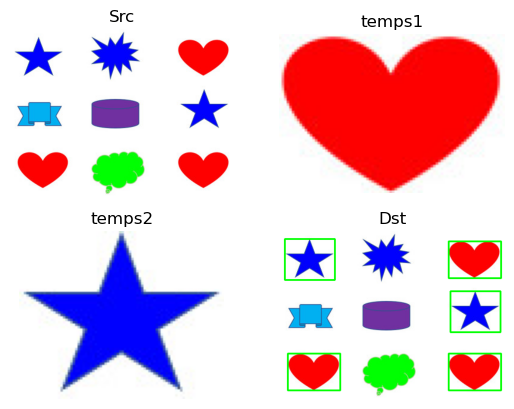

In [ ]:
# 多模板匹配 + 非極大值抑制
# NMSBoxes(),有匹配大於thr數值的功能，取消np的比對。
import cv2
import matplotlib.pyplot as plt

def myMatch(image, tmp, thr=0.95, nms_iou=0.3):
    h, w = tmp.shape[:2]
    result = cv2.matchTemplate(image, tmp, cv2.TM_CCOEFF_NORMED)
    # 取出所有高於門檻的點
    boxes, scores = [], []
    for x in range(result.shape[1]):
        for y in range(result.shape[0]):
            boxes.append([int(x), int(y), int(w), int(h)]) # x, y, width, height
            scores.append(float(result[y, x]))
    # 沒找到就回傳空
    if not boxes:
        return []
    # NMS：只保留不重疊（或低重疊）的高分框
    indices = cv2.dnn.NMSBoxes(
        boxes, scores, score_threshold=thr, nms_threshold=nms_iou)
    final = []
    if len(indices) > 0:
        for i in indices.flatten():
            x, y, bw, bh = boxes[i]
            final.append(((x, y), (x + bw, y + bh)))
    return final
src = cv2.imread("mutishapes1.jpg")
plt.subplot(221)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Src')
plt.axis('off')
temps = [cv2.imread("heart1.jpg"), cv2.imread("star.jpg")]
for i in range(len(temps)):
    plots = 222 + i
    plt.subplot(plots)
    plt.imshow(cv2.cvtColor(temps[i], cv2.COLOR_BGR2RGB))
    plt.title(f'temps{i+1}')
    plt.axis('off')     
match = []
for t in temps:
    match += myMatch(src, t, thr=0.95, nms_iou=0.3) # IoU門檻0.3~0.5
for pt1, pt2 in match:
    cv2.rectangle(src, pt1, pt2, (0, 255, 0), 2)
cv2.imshow("Dst", src)
plt.subplot(224)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Dst')
plt.axis('off') 
cv2.waitKey(0)
cv2.destroyAllWindows()